# Websites Phishing using Supervised Learning

The main idea of this project is to how website phishing attacks can be prevented using supervised machine learning. In this project I am going to use Logistic Regression to get accuracy. 
In this project I am going to use UCI Phishing Websites Data Set, which contains 11055 instances and 31 attributes.
Link for UCI Phishing Websites Dataset: https://archive.ics.uci.edu/ml/datasets/phishing+websites

In [57]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [101]:


df=pd.read_csv('D:/Security/Project/Phishing Dataset/csv_result-Training Dataset.csv')

In [150]:
df.head().T

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,0
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,0
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,0


Checking all columns in the dataset

In [116]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Class'],
      dtype='object')

Now we will check the total number of observations and classes in the dataset:


In [104]:

from collections import Counter


In [105]:

classes = Counter(df['Result'].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

In [146]:
class_distribution = pd.DataFrame(classes.most_common(), columns=['Class', 'Number of Observations'])
class_distribution

,Class,Number of Observations
0,1,6157
1,-1,4898


Plotting Class vs Number of Obervations 

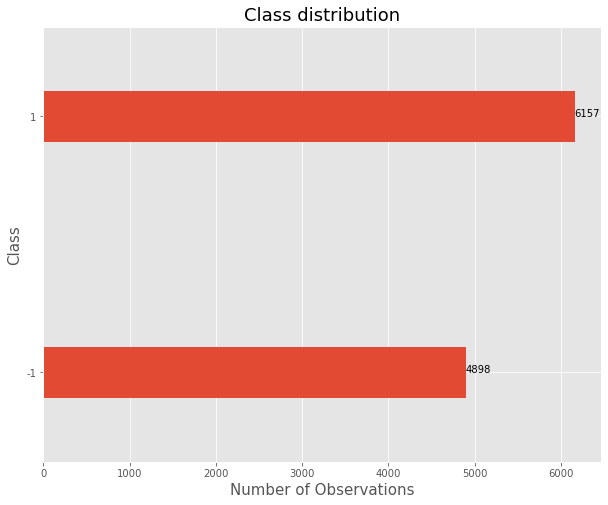

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plot = class_distribution.groupby('Class')['Number of Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

plot.set_title('Class distribution', fontsize = 18)
plot.set_xlabel('Number of Observations', fontsize = 15)
plot.set_ylabel('Class', fontsize = 15)

for i in plot.patches:
    plot.text(i.get_width()+0.1, i.get_y()+0.1,str(i.get_width()), fontsize=10)

Summary of the dataset

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


concise summary of the dataset:

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [110]:
df.rename(columns={'Result': 'Class'}, inplace=True)

df['Class'] = df['Class'].map({-1:0, 1:1})
df['Class'].unique()

array([0, 1], dtype=int64)

Checking for NA 

In [111]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

Train the dataset with test size 20% 

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

Applying the Supervised Machine Learning Algorithm Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

logistic_Regression = LogisticRegression()
logistic_Regression.fit(X_train, y_train)

LogisticRegression()

Predicting based on Logistic Regression

In [151]:
from sklearn.metrics import accuracy_score, classification_report
score = logistic_Regression.score(X_train, y_train)
print('Accuracy score ',score)
print('\n')
print('Accuracy score of the Logistic Regression Classifier {0:.2f}%'
      .format(accuracy_score(y_test, logistic_Regression.predict(X_test))*100.))
print('\n')
print('*****Classification report of the Logistic Regression classifier with default hyperparameter value*****')
print('\n')
print(classification_report(y_test, logistic_Regression.predict(X_test), 
                            target_names=['Phishing Websites', 'Normal Websites']))


Accuracy score  0.9248077792853913


Accuracy score of the Logistic Regression Classifier 93.71%


*****Classification report of the Logistic Regression classifier with default hyperparameter value*****


                   precision    recall  f1-score   support

Phishing Websites       0.94      0.92      0.93       974
  Normal Websites       0.94      0.95      0.94      1237

         accuracy                           0.94      2211
        macro avg       0.94      0.94      0.94      2211
     weighted avg       0.94      0.94      0.94      2211



Creating Confusion Matrix

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [140]:
confusion_matrix = metrics.confusion_matrix(y_test, logistic_Regression.predict(X_test))
print(confusion_matrix)

[[ 896   78]
 [  61 1176]]


Plotting Confusion Matrix

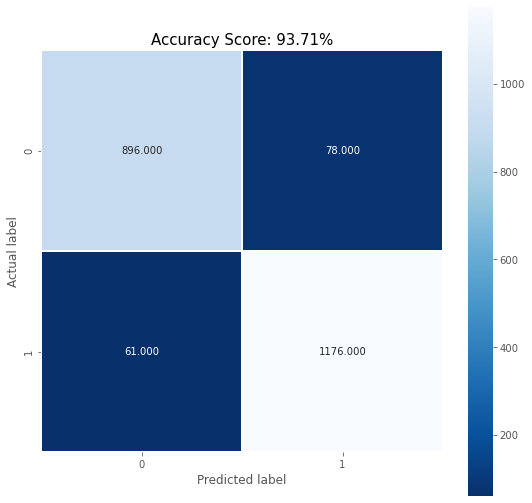

In [143]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}%'.format(accuracy_score(y_test, logistic_Regression.predict(X_test))*100.)
plt.title(all_sample_title, size = 15);